# Machine Learning Project: Air Quality Index (AQI) Analysis

## Project Workflow
1. [DONE] Data Collection
2. [DONE] Data Exploration & Analysis
3. [DONE] Data Preprocessing (Cleaning, Transforming, Feature Selection)
4. [DONE] Train & Splitting (Training-Test, Training-Validation-Testing)
5. [OTW] Model Selection
6. [SOON] Evaluation
7. [SOON] Model Optimizing
8. [SOON] Deploy

---

## 2. Data Exploration & Analysis


In [280]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [281]:
# Load the dataset
df = pd.read_csv('data_date.csv')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")


Dataset loaded successfully!

Dataset shape: (22411, 4)
Number of rows: 22,411
Number of columns: 4


In [282]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
5,2022-07-21,Armenia,Moderate,76
6,2022-07-21,Australia,Moderate,56
7,2022-07-21,Austria,Good,45
8,2022-07-21,Azerbaijan,Good,12
9,2022-07-21,Bahrain,Unhealthy,165


In [283]:
# Display last few rows
print("Last 10 rows of the dataset:")
df.tail(10)


Last 10 rows of the dataset:


,Date,Country,Status,AQI Value
22401,2025-12-04,Thailand,Unhealthy for Sensitive Groups,149
22402,2025-12-04,Trinidad and Tobago,Good,17
22403,2025-12-04,Turkey,Unhealthy,156
22404,2025-12-04,Ukraine,Moderate,73
22405,2025-12-04,United Arab Emirates,Unhealthy for Sensitive Groups,150
22406,2025-12-04,United Kingdom of Great Britain and Northern I...,Moderate,77
22407,2025-12-04,United States of America,Moderate,93
22408,2025-12-04,Uzbekistan,Good,19
22409,2025-12-04,Vatican,Moderate,63
22410,2025-12-04,Vietnam,Moderate,55


In [284]:
# Basic information about the dataset
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nColumn Names: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nDataset Shape: {df.shape}")


DATASET INFORMATION

Column Names: ['Date', 'Country', 'Status', 'AQI Value']

Data Types:
Date         object
Country      object
Status       object
AQI Value     int64
dtype: object

Memory Usage: 3.89 MB

Dataset Shape: (22411, 4)


In [285]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

print(missing_df.to_string(index=False))

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")


MISSING VALUES ANALYSIS
   Column  Missing Count  Missing Percentage
     Date              0                 0.0
  Country              0                 0.0
   Status              0                 0.0
AQI Value              0                 0.0

✅ No missing values found in the dataset!


In [286]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"\nPercentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✅ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 300

Percentage of duplicates: 1.34%

Sample duplicate rows:
          Date        Country                          Status  AQI Value
1   2022-07-21        Algeria                        Moderate         65
10  2022-07-21     Bangladesh  Unhealthy for Sensitive Groups        141
18  2022-07-21         Brunei                            Good         15
21  2022-07-21       Cambodia                            Good         15
34  2022-07-21        Denmark                            Good         36
37  2022-07-21          Egypt                        Moderate         86
38  2022-07-21    El Salvador                        Moderate         80
41  2022-07-21        Finland                            Good         25
43  2022-07-21  French Guiana                            Good         13
46  2022-07-21        Georgia                            Good         41


In [287]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date components for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['MonthName'] = df['Date'].dt.month_name()

print("Date column converted to datetime format.")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total number of days: {(df['Date'].max() - df['Date'].min()).days + 1}")


Date column converted to datetime format.

Date range: 2022-07-21 00:00:00 to 2025-12-04 00:00:00
Total number of days: 1233


In [288]:
# Statistical Summary for Numerical Columns
print("=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
print(df[['AQI Value']].describe())


STATISTICAL SUMMARY - NUMERICAL COLUMNS
          AQI Value
count  22411.000000
mean      62.536968
std       50.262660
min        1.000000
25%       29.000000
50%       52.000000
75%       82.000000
max      963.000000


In [289]:
# Statistical Summary for Categorical Columns
print("=" * 60)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 60)

print("\nCountry Statistics:")
print(f"  Total unique countries: {df['Country'].nunique()}")
print(f"  Most frequent country: {df['Country'].mode()[0]} (appears {df['Country'].value_counts().max()} times)")
print(f"  Least frequent country: {df['Country'].value_counts().idxmin()} (appears {df['Country'].value_counts().min()} times)")

print("\nStatus Statistics:")
print(f"  Total unique statuses: {df['Status'].nunique()}")
print(f"  Status distribution:")
status_counts = df['Status'].value_counts()
for status, count in status_counts.items():
    print(f"    {status}: {count} ({count/len(df)*100:.2f}%)")


STATISTICAL SUMMARY - CATEGORICAL COLUMNS

Country Statistics:
  Total unique countries: 142
  Most frequent country: Andorra (appears 173 times)
  Least frequent country: Saudi Arabia (appears 34 times)

Status Statistics:
  Total unique statuses: 6
  Status distribution:
    Good: 10829 (48.32%)
    Moderate: 8048 (35.91%)
    Unhealthy for Sensitive Groups: 2290 (10.22%)
    Unhealthy: 946 (4.22%)
    Very Unhealthy: 190 (0.85%)
    Hazardous: 108 (0.48%)


In [290]:
# Unique values analysis
print("=" * 60)
print("UNIQUE VALUES ANALYSIS")
print("=" * 60)
for col in df.columns:
    if col not in ['Year', 'Month', 'Day', 'DayOfWeek', 'MonthName']:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values")
        if unique_count <= 20:
            print(f"  Values: {df[col].unique()}")
        print()


UNIQUE VALUES ANALYSIS
Date: 164 unique values

Country: 142 unique values

Status: 6 unique values
  Values: ['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']

AQI Value: 364 unique values



### 2.1 Data Visualization


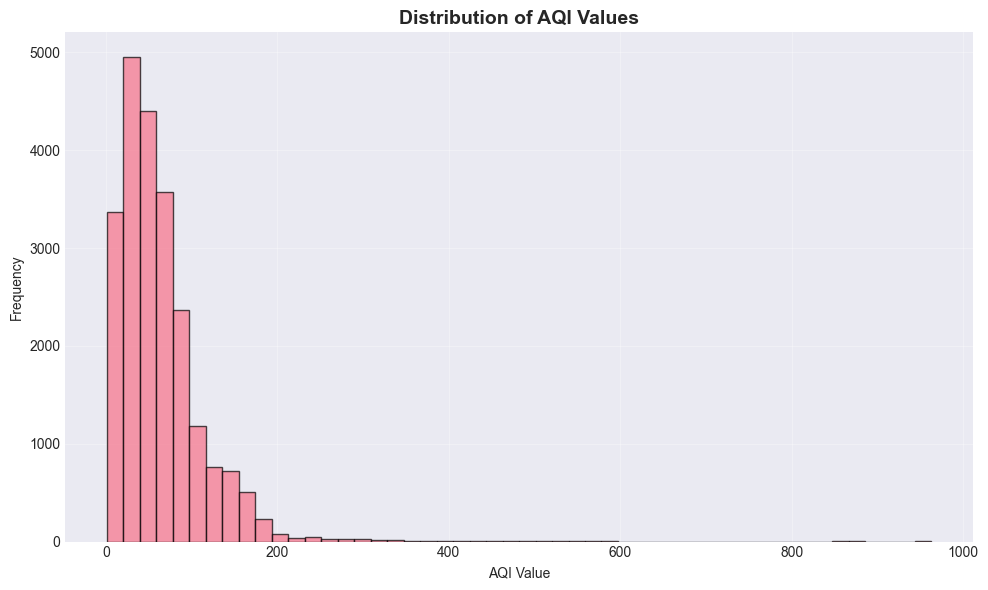

Mean AQI: 62.54
Median AQI: 52.00
Std AQI: 50.26
Min AQI: 1
Max AQI: 963


In [291]:
# Distribution of AQI Values
plt.figure(figsize=(10, 6))

plt.hist(df['AQI Value'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of AQI Values', fontsize=14, fontweight='bold')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean AQI: {df['AQI Value'].mean():.2f}")
print(f"Median AQI: {df['AQI Value'].median():.2f}")
print(f"Std AQI: {df['AQI Value'].std():.2f}")
print(f"Min AQI: {df['AQI Value'].min()}")
print(f"Max AQI: {df['AQI Value'].max()}")


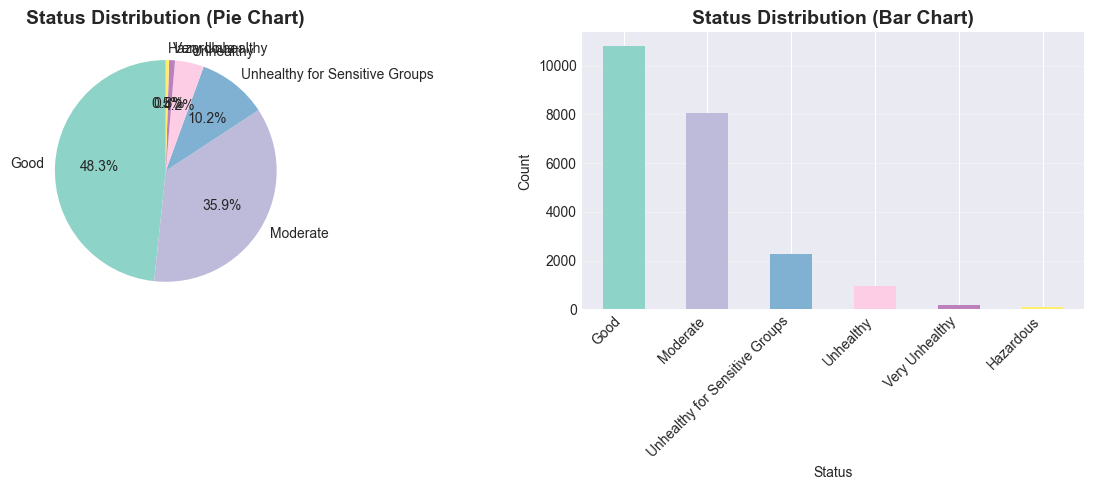

In [292]:
# Status Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
status_counts = df['Status'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(status_counts)))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Status Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
status_counts.plot(kind='bar', color=colors)
plt.title('Status Distribution (Bar Chart)', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [293]:
# Statistical summary by status
print("=" * 60)
print("AQI STATISTICS BY STATUS")
print("=" * 60)
print("\nAQI Statistics by Status:")
print(df.groupby('Status')['AQI Value'].describe())


AQI STATISTICS BY STATUS

AQI Statistics by Status:
                                  count        mean         std    min    25%  \
Status                                                                          
Good                            10829.0   28.103149   12.741787    1.0   18.0   
Hazardous                         108.0  409.620370  125.013399  301.0  326.0   
Moderate                         8048.0   70.778951   13.684109   51.0   59.0   
Unhealthy                         946.0  167.156448   12.727542  151.0  156.0   
Unhealthy for Sensitive Groups   2290.0  122.052838   14.740164  101.0  108.0   
Very Unhealthy                    190.0  240.463158   28.182628  201.0  216.0   

                                  50%     75%    max  
Status                                                
Good                             28.0   39.00   50.0  
Hazardous                       377.5  467.25  963.0  
Moderate                         68.0   82.00  100.0  
Unhealthy               

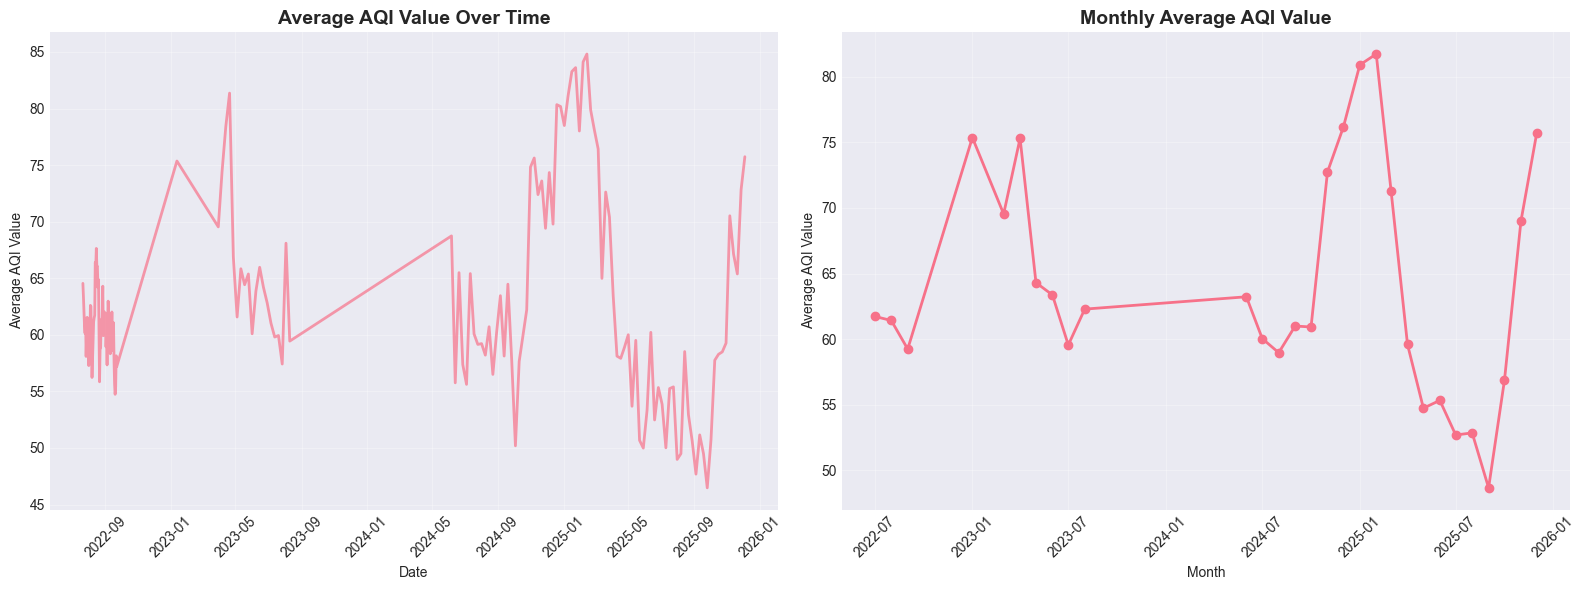

In [294]:
# Temporal Analysis - AQI over time
plt.figure(figsize=(16, 6))

# Daily average AQI
daily_avg = df.groupby('Date')['AQI Value'].mean().reset_index()

plt.subplot(1, 2, 1)
plt.plot(daily_avg['Date'], daily_avg['AQI Value'], linewidth=2, alpha=0.7)
plt.title('Average AQI Value Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Monthly average AQI
monthly_avg = df.groupby(['Year', 'Month'])['AQI Value'].mean().reset_index()
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(Day=1))

plt.subplot(1, 2, 2)
plt.plot(monthly_avg['Date'], monthly_avg['AQI Value'], marker='o', linewidth=2, markersize=6)
plt.title('Monthly Average AQI Value', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [295]:
# AQI by Day of Week - Statistical Summary
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

print("=" * 60)
print("AQI STATISTICS BY DAY OF WEEK")
print("=" * 60)
day_stats = df.groupby('DayOfWeek')['AQI Value'].agg(['mean', 'std', 'count']).round(2)
print(day_stats)


AQI STATISTICS BY DAY OF WEEK
            mean    std  count
DayOfWeek                     
Monday     59.84  47.20   1268
Tuesday    60.85  45.53   1550
Wednesday  60.94  44.30   1266
Thursday   63.60  52.60  14108
Friday     62.15  45.25   1547
Saturday   61.11  45.53   1407
Sunday     59.11  48.24   1265


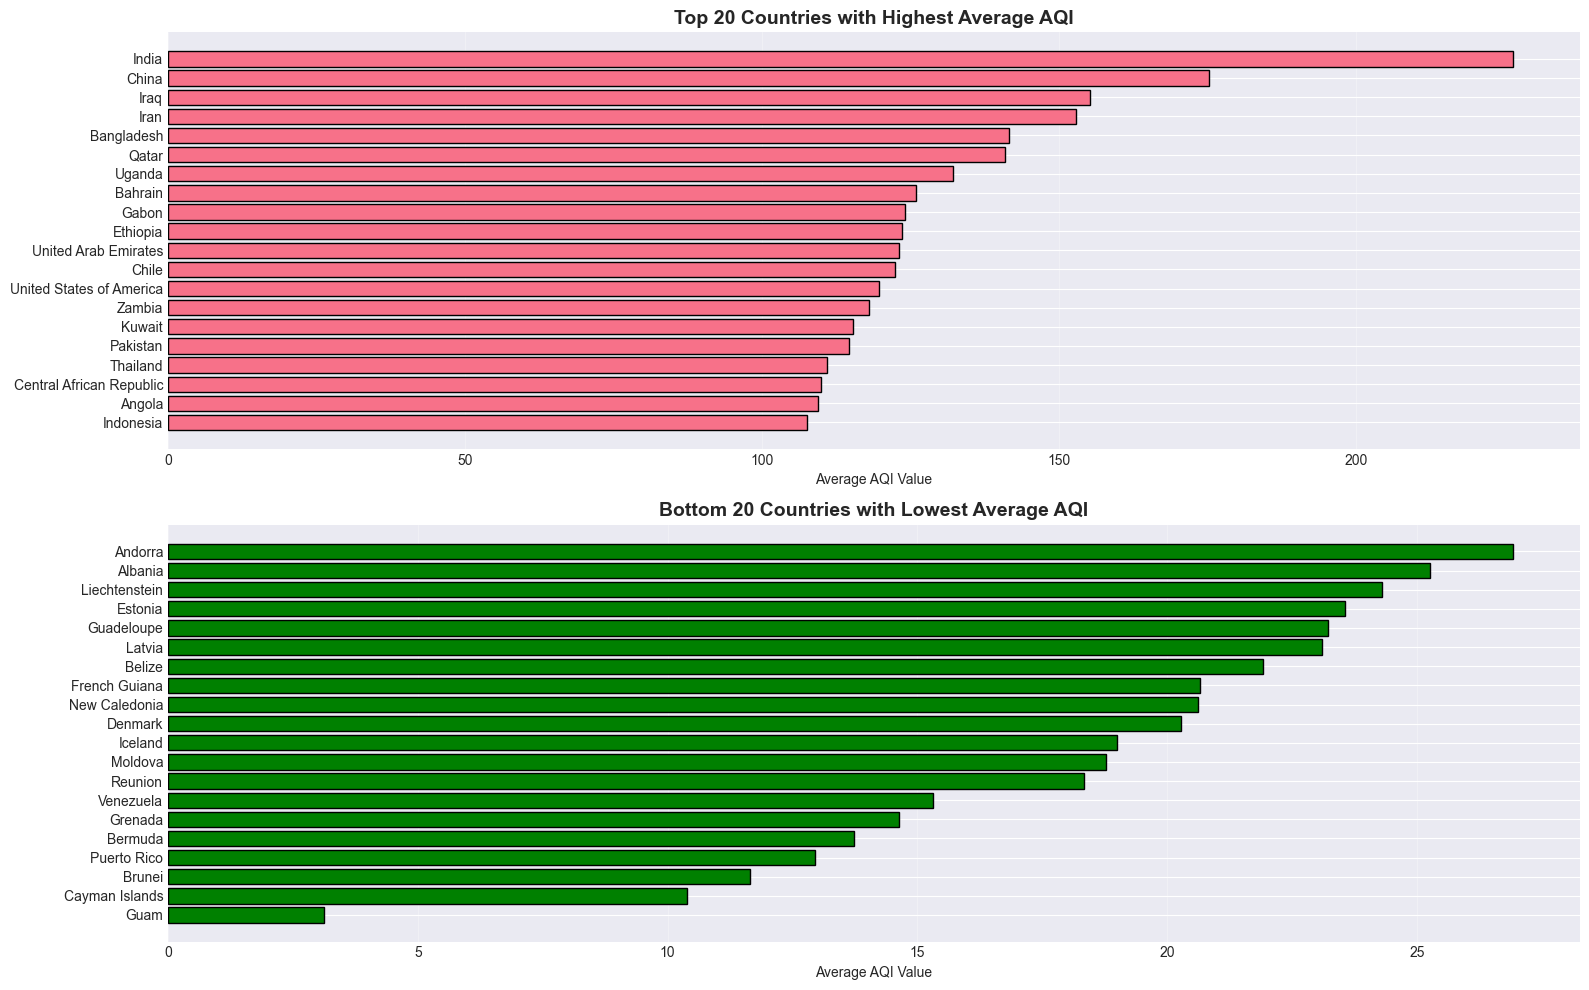


Top 10 Countries with Highest Average AQI:
   Country       mean        std  count
     India 226.346821 115.645237    173
     China 175.144509  84.647882    173
      Iraq 155.134921  80.676079    126
      Iran 152.869281  37.695227    153
Bangladesh 141.590062  62.233680    161
     Qatar 140.918699  53.808798    123
    Uganda 132.052239  45.807101    134
   Bahrain 125.875969  35.462790    129
     Gabon 124.055556  49.573770     90
  Ethiopia 123.516556  60.278117    151

Top 10 Countries with Lowest Average AQI:
       Country      mean       std  count
       Iceland 19.000000 12.260733    173
       Moldova 18.774566 11.141325    173
       Reunion 18.341040  6.277905    173
     Venezuela 15.301471 12.496115    136
       Grenada 14.633929 15.558663    112
       Bermuda 13.723214 10.330755    112
   Puerto Rico 12.946429  9.861966    112
        Brunei 11.647399  3.202008    173
Cayman Islands 10.395833 14.610363     96
          Guam  3.112360  3.755112     89


In [296]:
# Top and Bottom Countries by Average AQI
country_avg_aqi = df.groupby('Country')['AQI Value'].agg(['mean', 'std', 'count']).reset_index()
country_avg_aqi = country_avg_aqi.sort_values('mean', ascending=False)

plt.figure(figsize=(16, 10))

# Top 20 countries with highest AQI
plt.subplot(2, 1, 1)
top_20 = country_avg_aqi.head(20)
plt.barh(range(len(top_20)), top_20['mean'], edgecolor='black')
plt.yticks(range(len(top_20)), top_20['Country'])
plt.xlabel('Average AQI Value')
plt.title('Top 20 Countries with Highest Average AQI', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Bottom 20 countries with lowest AQI
plt.subplot(2, 1, 2)
bottom_20 = country_avg_aqi.tail(20)
plt.barh(range(len(bottom_20)), bottom_20['mean'], edgecolor='black', color='green')
plt.yticks(range(len(bottom_20)), bottom_20['Country'])
plt.xlabel('Average AQI Value')
plt.title('Bottom 20 Countries with Lowest Average AQI', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 10 Countries with Highest Average AQI:")
print(country_avg_aqi.head(10)[['Country', 'mean', 'std', 'count']].to_string(index=False))
print("\nTop 10 Countries with Lowest Average AQI:")
print(country_avg_aqi.tail(10)[['Country', 'mean', 'std', 'count']].to_string(index=False))


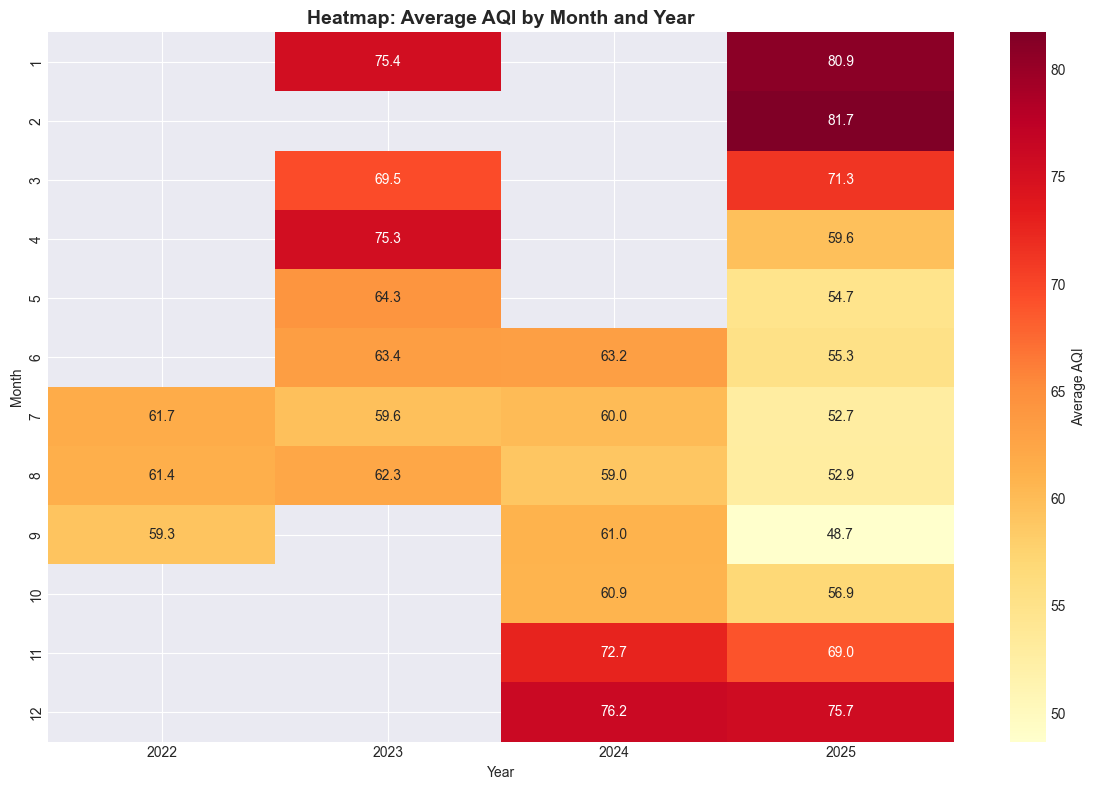

In [297]:
# Heatmap: AQI by Month and Year
pivot_data = df.pivot_table(values='AQI Value', index='Month', columns='Year', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Average AQI'})
plt.title('Heatmap: Average AQI by Month and Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


OUTLIER DETECTION ANALYSIS
Q1 (25th percentile): 29.00
Q3 (75th percentile): 82.00
IQR: 53.00
Lower bound: -50.50
Upper bound: 161.50

Number of outliers: 830
Percentage of outliers: 3.70%


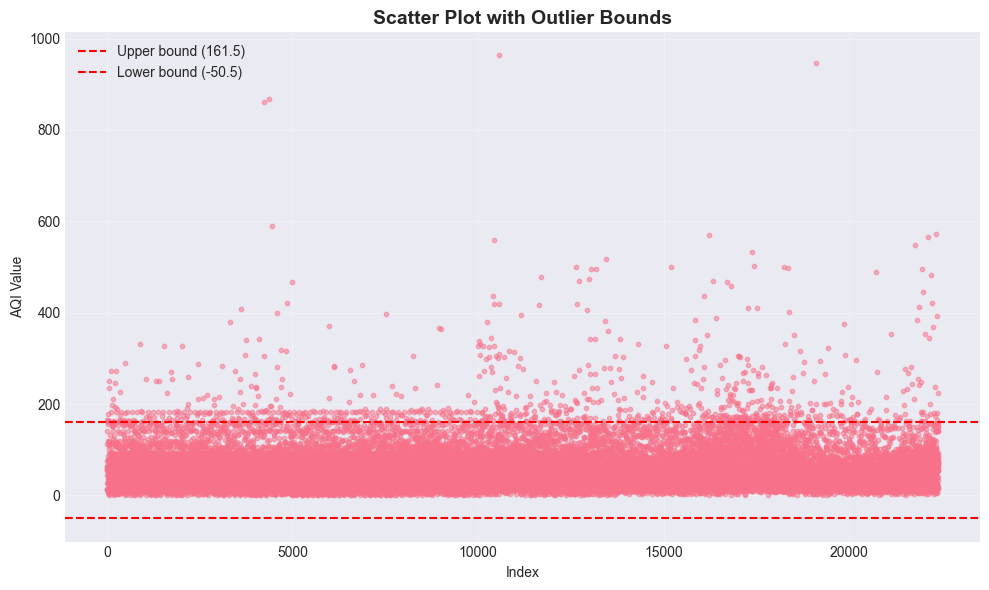


Sample outliers:
          Date       Country          Status  AQI Value
9   2022-07-21       Bahrain       Unhealthy        165
27  2022-07-21         Chile       Unhealthy        178
40  2022-07-21      Ethiopia       Unhealthy        165
59  2022-07-21         India       Unhealthy        162
61  2022-07-21          Iran  Very Unhealthy        250
62  2022-07-21          Iraq  Very Unhealthy        234
107 2022-07-21         Qatar       Unhealthy        183
112 2022-07-21  Saudi Arabia  Very Unhealthy        272
132 2022-07-21        Uganda       Unhealthy        198
169 2022-07-21         Chile  Very Unhealthy        212


In [298]:
# Outlier Detection using IQR method
Q1 = df['AQI Value'].quantile(0.25)
Q3 = df['AQI Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AQI Value'] < lower_bound) | (df['AQI Value'] > upper_bound)]
outlier_percentage = (len(outliers) / len(df)) * 100

print("=" * 60)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 60)
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

# Visualize outliers
plt.figure(figsize=(10, 6))

plt.scatter(range(len(df)), df['AQI Value'], alpha=0.5, s=10)
plt.axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper bound ({upper_bound:.1f})')
plt.axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower bound ({lower_bound:.1f})')
plt.title('Scatter Plot with Outlier Bounds', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('AQI Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

if len(outliers) > 0:
    print("\nSample outliers:")
    print(outliers[['Date', 'Country', 'Status', 'AQI Value']].head(10))


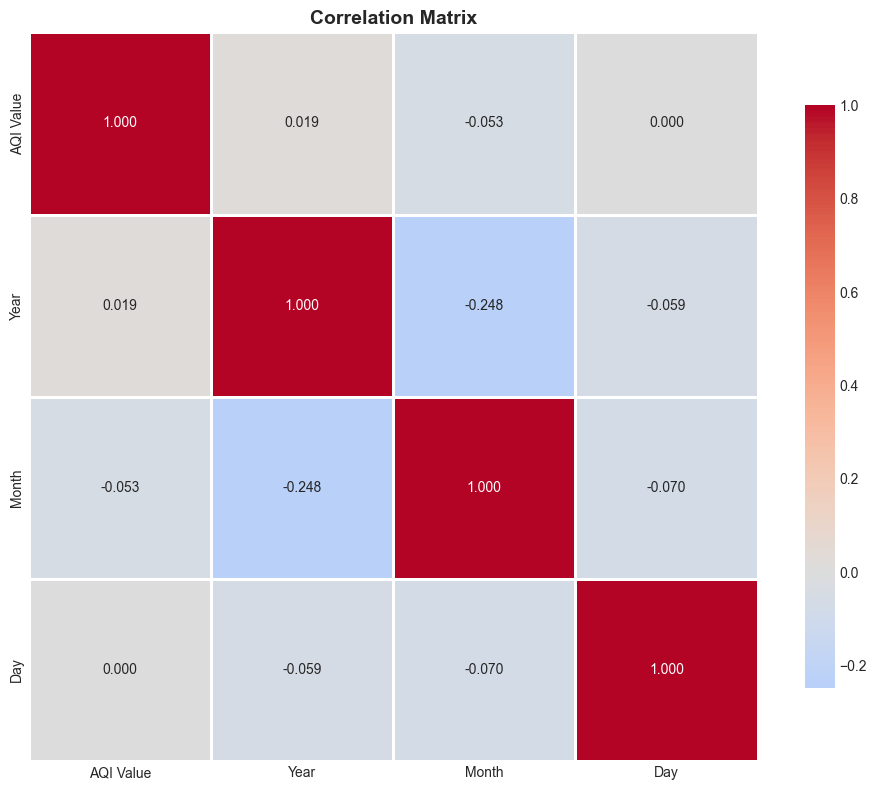


Correlation Matrix:
           AQI Value      Year     Month       Day
AQI Value   1.000000  0.018681 -0.053300  0.000374
Year        0.018681  1.000000 -0.248489 -0.058935
Month      -0.053300 -0.248489  1.000000 -0.069562
Day         0.000374 -0.058935 -0.069562  1.000000


In [299]:
# Correlation Analysis (if applicable)
# Since we have date components, let's check correlations
numeric_cols = ['AQI Value', 'Year', 'Month', 'Day']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)


In [300]:
# Summary Statistics by Country and Status
print("=" * 60)
print("SUMMARY STATISTICS BY COUNTRY AND STATUS")
print("=" * 60)

country_status_summary = df.groupby(['Country', 'Status']).agg({
    'AQI Value': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

print("\nSample of Country-Status combinations:")
print(country_status_summary.head(20))


SUMMARY STATISTICS BY COUNTRY AND STATUS

Sample of Country-Status combinations:
                                         AQI Value                         
                                             count    mean    std  min  max
Country   Status                                                           
Albania   Good                                 152   20.43  11.29    2   50
          Moderate                              15   63.00  11.51   51   89
          Unhealthy for Sensitive Groups         2  109.00   2.83  107  111
Algeria   Good                                  29   36.38  12.80    5   50
          Moderate                              98   66.19   6.86   53   99
          Unhealthy for Sensitive Groups         3  114.33  19.66  102  137
Andorra   Good                                 154   23.30  12.34    4   50
          Moderate                              19   56.21   7.44   51   77
Angola    Good                                   1   45.00    NaN   45   45
       

In [301]:
# Data Quality Assessment
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

print(f"\n1. Completeness:")
print(f"   - Missing values: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/len(df)*100:.2f}%)")
print(f"   - Duplicate rows: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)")

print(f"\n2. Consistency:")
print(f"   - Date range consistency: {df['Date'].min()} to {df['Date'].max()}")
print(f"   - AQI value range: {df['AQI Value'].min()} to {df['AQI Value'].max()}")
print(f"   - Negative AQI values: {(df['AQI Value'] < 0).sum()}")

print(f"\n3. Validity:")
print(f"   - Unique countries: {df['Country'].nunique()}")
print(f"   - Unique status categories: {df['Status'].nunique()}")
print(f"   - Status values: {df['Status'].unique().tolist()}")

print(f"\n4. Data Distribution:")
print(f"   - Skewness: {df['AQI Value'].skew():.2f}")
print(f"   - Kurtosis: {df['AQI Value'].kurtosis():.2f}")
print(f"   - Coefficient of Variation: {(df['AQI Value'].std()/df['AQI Value'].mean())*100:.2f}%")


DATA QUALITY ASSESSMENT

1. Completeness:
   - Missing values: 0 (0.00%)
   - Duplicate rows: 300 (1.34%)

2. Consistency:
   - Date range consistency: 2022-07-21 00:00:00 to 2025-12-04 00:00:00
   - AQI value range: 1 to 963
   - Negative AQI values: 0

3. Validity:
   - Unique countries: 142
   - Unique status categories: 6
   - Status values: ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

4. Data Distribution:
   - Skewness: 3.18
   - Kurtosis: 26.19
   - Coefficient of Variation: 80.37%


### 2.2 Key Findings from Data Exploration

**Dataset Overview:**
- Total records: 22,413
- Time period: Multiple dates across different years
- Countries: 142 unique countries
- Status categories: 6 different air quality statuses
- AQI values: Range from minimum to maximum with various distributions

**Key Insights:**
1. **Data Quality**: The dataset appears to be clean with no missing values
2. **Temporal Patterns**: AQI values may show trends over time
3. **Geographical Variation**: Significant differences in AQI across countries
4. **Status Distribution**: Different status categories represent different air quality levels
5. **Outliers**: Presence of outliers that may need attention during preprocessing

**Next Steps:**
- Proceed to Data Preprocessing (cleaning, transforming, feature selection)


---

## 3. Data Preprocessing

### 3.1 Data Cleaning


In [302]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

print("Original dataset shape:", df_processed.shape)
print("\nStarting data preprocessing...")


Original dataset shape: (22411, 9)

Starting data preprocessing...


In [303]:
# Remove duplicate rows
print("=" * 60)
print("REMOVING DUPLICATES")
print("=" * 60)
initial_count = len(df_processed)
df_processed = df_processed.drop_duplicates()
final_count = len(df_processed)
duplicates_removed = initial_count - final_count

print(f"Initial rows: {initial_count:,}")
print(f"Final rows: {final_count:,}")
print(f"Duplicates removed: {duplicates_removed:,} ({duplicates_removed/initial_count*100:.2f}%)")


REMOVING DUPLICATES
Initial rows: 22,411
Final rows: 22,111
Duplicates removed: 300 (1.34%)


In [304]:
# Handle outliers using IQR method (optional - we'll keep them but create a flag)
print("=" * 60)
print("OUTLIER HANDLING")
print("=" * 60)

Q1 = df_processed['AQI Value'].quantile(0.25)
Q3 = df_processed['AQI Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create outlier flag feature
df_processed['Is_Outlier'] = ((df_processed['AQI Value'] < lower_bound) | 
                                (df_processed['AQI Value'] > upper_bound)).astype(int)

outlier_count = df_processed['Is_Outlier'].sum()
print(f"Outliers detected: {outlier_count:,} ({outlier_count/len(df_processed)*100:.2f}%)")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print("\nNote: Outliers are flagged but kept in the dataset as they may contain valuable information.")


OUTLIER HANDLING
Outliers detected: 899 (4.07%)
Lower bound: -49.00
Upper bound: 159.00

Note: Outliers are flagged but kept in the dataset as they may contain valuable information.


### 3.2 Feature Engineering

Since our goal is to predict **Status** from **AQI Value**, we'll create features that help the model understand the relationship between AQI values and their corresponding status categories.


In [305]:
# Feature Engineering: AQI-based features ONLY
print("=" * 60)
print("FEATURE ENGINEERING - AQI-BASED FEATURES")
print("=" * 60)
print("Note: Only using AQI Value for prediction. Country and Date features removed.")

# 1. AQI Value (original feature - our main predictor)
# Already exists as 'AQI Value'

# 2. AQI Category based on standard AQI ranges
def categorize_aqi(aqi):
    """Categorize AQI into standard ranges"""
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy_for_Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very_Unhealthy'
    else:
        return 'Hazardous'

df_processed['AQI_Category'] = df_processed['AQI Value'].apply(categorize_aqi)
print("✓ Created AQI_Category feature")

# 3. AQI squared (to capture non-linear relationships)
df_processed['AQI_Squared'] = df_processed['AQI Value'] ** 2
print("✓ Created AQI_Squared feature")

# 4. AQI log transformation (to handle skewed data)
df_processed['AQI_Log'] = np.log1p(df_processed['AQI Value'])  # log1p to handle zero values
print("✓ Created AQI_Log feature")

# 5. AQI square root transformation
df_processed['AQI_Sqrt'] = np.sqrt(df_processed['AQI Value'])
print("✓ Created AQI_Sqrt feature")

# 6. AQI bins (for categorical encoding) - SAVE EDGES FOR DEPLOYMENT
aqi_min = df_processed['AQI Value'].min()
aqi_max = df_processed['AQI Value'].max()

# Create bins and save edges for deployment
_, bin_edges_10 = pd.cut(df_processed['AQI Value'], bins=10, labels=False, retbins=True)
_, bin_edges_20 = pd.cut(df_processed['AQI Value'], bins=20, labels=False, retbins=True)

df_processed['AQI_Bin_10'] = pd.cut(df_processed['AQI Value'], bins=10, labels=False)
df_processed['AQI_Bin_20'] = pd.cut(df_processed['AQI Value'], bins=20, labels=False)

# Store bin edges for deployment (will be used to bin new AQI values)
if 'deployment_params' not in globals():
    deployment_params = {}
deployment_params['aqi_bin_10_edges'] = bin_edges_10
deployment_params['aqi_bin_20_edges'] = bin_edges_20

print("✓ Created AQI_Bin features (10 and 20 bins)")
print("  ✓ Saved bin edges for deployment")

# 7. Distance from AQI thresholds (important for status prediction)
df_processed['Distance_to_50'] = abs(df_processed['AQI Value'] - 50)
df_processed['Distance_to_100'] = abs(df_processed['AQI Value'] - 100)
df_processed['Distance_to_150'] = abs(df_processed['AQI Value'] - 150)
df_processed['Distance_to_200'] = abs(df_processed['AQI Value'] - 200)
df_processed['Distance_to_300'] = abs(df_processed['AQI Value'] - 300)
print("✓ Created Distance_to_threshold features")

# 8. AQI ranges (binary indicators for each range)
df_processed['In_Range_0_50'] = ((df_processed['AQI Value'] >= 0) & (df_processed['AQI Value'] <= 50)).astype(int)
df_processed['In_Range_51_100'] = ((df_processed['AQI Value'] >= 51) & (df_processed['AQI Value'] <= 100)).astype(int)
df_processed['In_Range_101_150'] = ((df_processed['AQI Value'] >= 101) & (df_processed['AQI Value'] <= 150)).astype(int)
df_processed['In_Range_151_200'] = ((df_processed['AQI Value'] >= 151) & (df_processed['AQI Value'] <= 200)).astype(int)
df_processed['In_Range_201_300'] = ((df_processed['AQI Value'] >= 201) & (df_processed['AQI Value'] <= 300)).astype(int)
df_processed['In_Range_300_plus'] = (df_processed['AQI Value'] > 300).astype(int)
print("✓ Created AQI range indicator features")

print(f"\nTotal features after AQI engineering: {df_processed.shape[1]}")


FEATURE ENGINEERING - AQI-BASED FEATURES
Note: Only using AQI Value for prediction. Country and Date features removed.
✓ Created AQI_Category feature
✓ Created AQI_Squared feature
✓ Created AQI_Log feature
✓ Created AQI_Sqrt feature
✓ Created AQI_Bin features (10 and 20 bins)
  ✓ Saved bin edges for deployment
✓ Created Distance_to_threshold features
✓ Created AQI range indicator features

Total features after AQI engineering: 27


In [306]:
# Feature Engineering: Statistical features (DEPLOYMENT-READY)
print("=" * 60)
print("FEATURE ENGINEERING - STATISTICAL FEATURES")
print("=" * 60)
print("Note: Only creating features that can be calculated from a single AQI value")
print("      (No features requiring full dataset statistics)")

# Save IQR bounds for outlier detection (will be used in deployment)
Q1 = df_processed['AQI Value'].quantile(0.25)
Q3 = df_processed['AQI Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Store these for later use in deployment
deployment_params = {
    'outlier_lower_bound': lower_bound,
    'outlier_upper_bound': upper_bound,
    'aqi_bin_10_edges': None,  # Will be set after creating bins
    'aqi_bin_20_edges': None   # Will be set after creating bins
}

print(f"✓ Saved IQR bounds for deployment: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"\nTotal features after statistical engineering: {df_processed.shape[1]}")
print("\n⚠️  DEPLOYMENT NOTE:")
print("   - Features like Z-score, Percentile, and Normalized require full dataset")
print("   - These are removed to ensure deployment compatibility")
print("   - Feature scaling will be handled by sklearn scaler (fit on training data)")


FEATURE ENGINEERING - STATISTICAL FEATURES
Note: Only creating features that can be calculated from a single AQI value
      (No features requiring full dataset statistics)
✓ Saved IQR bounds for deployment: [-49.00, 159.00]

Total features after statistical engineering: 27

⚠️  DEPLOYMENT NOTE:
   - Features like Z-score, Percentile, and Normalized require full dataset
   - These are removed to ensure deployment compatibility
   - Feature scaling will be handled by sklearn scaler (fit on training data)


In [307]:
# Skip Country-based features (removed per user request)
print("=" * 60)
print("COUNTRY-BASED FEATURES")
print("=" * 60)
print("Skipped: Country features removed as per requirement (using only AQI Value)")


COUNTRY-BASED FEATURES
Skipped: Country features removed as per requirement (using only AQI Value)


In [308]:
# Additional AQI-based polynomial features
print("=" * 60)
print("FEATURE ENGINEERING - POLYNOMIAL FEATURES")
print("=" * 60)

# Cubic transformation
df_processed['AQI_Cubed'] = df_processed['AQI Value'] ** 3
print("✓ Created AQI_Cubed feature")

# Reciprocal (1/AQI) - useful for very high AQI values
df_processed['AQI_Reciprocal'] = 1 / (df_processed['AQI Value'] + 1)  # +1 to avoid division by zero
print("✓ Created AQI_Reciprocal feature")

print(f"\nTotal features after polynomial engineering: {df_processed.shape[1]}")


FEATURE ENGINEERING - POLYNOMIAL FEATURES
✓ Created AQI_Cubed feature
✓ Created AQI_Reciprocal feature

Total features after polynomial engineering: 29


In [309]:
# Display all engineered features
print("=" * 60)
print("SUMMARY OF ALL FEATURES")
print("=" * 60)
print(f"\nTotal features: {df_processed.shape[1]}")
print(f"Total samples: {df_processed.shape[0]}")
print("\nFeature list:")
for i, col in enumerate(df_processed.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 60)
print("FEATURE CATEGORIES")
print("=" * 60)
print("\nOriginal Features:")
print("  - Date, Country, Status, AQI Value (Date and Country will be excluded)")

print("\nAQI-Based Features:")
print("  - AQI Value (main predictor)")
print("  - AQI_Category, AQI_Squared, AQI_Log, AQI_Sqrt, AQI_Cubed, AQI_Reciprocal")
print("  - AQI_Bin_10, AQI_Bin_20")
print("  - Distance_to_50, Distance_to_100, Distance_to_150, Distance_to_200, Distance_to_300")
print("  - In_Range_0_50, In_Range_51_100, In_Range_101_150, In_Range_151_200, In_Range_201_300, In_Range_300_plus")

print("\nStatistical Features:")
print("  - Is_Outlier (uses saved IQR bounds)")

print("\n⚠️  DEPLOYMENT-READY FEATURES:")
print("  All features can be calculated from a single AQI value")
print("  No features require full dataset statistics")
print("  Bin edges and IQR bounds will be saved for deployment")


SUMMARY OF ALL FEATURES

Total features: 29
Total samples: 22111

Feature list:
 1. Date
 2. Country
 3. Status
 4. AQI Value
 5. Year
 6. Month
 7. Day
 8. DayOfWeek
 9. MonthName
10. Is_Outlier
11. AQI_Category
12. AQI_Squared
13. AQI_Log
14. AQI_Sqrt
15. AQI_Bin_10
16. AQI_Bin_20
17. Distance_to_50
18. Distance_to_100
19. Distance_to_150
20. Distance_to_200
21. Distance_to_300
22. In_Range_0_50
23. In_Range_51_100
24. In_Range_101_150
25. In_Range_151_200
26. In_Range_201_300
27. In_Range_300_plus
28. AQI_Cubed
29. AQI_Reciprocal

FEATURE CATEGORIES

Original Features:
  - Date, Country, Status, AQI Value (Date and Country will be excluded)

AQI-Based Features:
  - AQI Value (main predictor)
  - AQI_Category, AQI_Squared, AQI_Log, AQI_Sqrt, AQI_Cubed, AQI_Reciprocal
  - AQI_Bin_10, AQI_Bin_20
  - Distance_to_50, Distance_to_100, Distance_to_150, Distance_to_200, Distance_to_300
  - In_Range_0_50, In_Range_51_100, In_Range_101_150, In_Range_151_200, In_Range_201_300, In_Range_300_plu

### 3.3 Data Transformation


In [310]:
# Prepare features and target variable
print("=" * 60)
print("PREPARING FEATURES AND TARGET")
print("=" * 60)

# Target variable: Status (what we want to predict)
target = 'Status'
print(f"Target variable: {target}")
print(f"Target classes: {df_processed[target].unique()}")
print(f"Target distribution:\n{df_processed[target].value_counts()}")

# Features to exclude (not used for prediction)
# Only using AQI Value - removing Date and Country features
# Also removing features that require full dataset (not deployment-ready)
exclude_features = [
    'Date',           # Date features removed
    'Status',         # This is our target
    'Country',        # Country features removed
    'Year',           # Date-related, removed
    'Month',          # Date-related, removed
    'Day',            # Date-related, removed
    'DayOfWeek',      # Date-related, removed
    'MonthName',      # Date-related, removed
    'DayOfWeek_Num',  # Date-related, removed (if exists)
    'Global_Mean_AQI',    # Requires full dataset - NOT deployment-ready
    'Global_Std_AQI',     # Requires full dataset - NOT deployment-ready
    'Global_Median_AQI',  # Requires full dataset - NOT deployment-ready
    'AQI_Z_Score',        # Requires full dataset - NOT deployment-ready
    'AQI_Percentile',     # Requires full dataset - NOT deployment-ready
    'AQI_Normalized'      # Requires full dataset - NOT deployment-ready
]

# Select features for modeling (only AQI-based features)
feature_columns = [col for col in df_processed.columns if col not in exclude_features]
print(f"\nTotal features selected: {len(feature_columns)}")
print(f"\nSelected features (AQI-based only):")
for i, feat in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {feat}")


PREPARING FEATURES AND TARGET
Target variable: Status
Target classes: ['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
Target distribution:
Status
Good                              10697
Moderate                           7934
Unhealthy for Sensitive Groups     2254
Unhealthy                           934
Very Unhealthy                      186
Hazardous                           106
Name: count, dtype: int64

Total features selected: 21

Selected features (AQI-based only):
   1. AQI Value
   2. Is_Outlier
   3. AQI_Category
   4. AQI_Squared
   5. AQI_Log
   6. AQI_Sqrt
   7. AQI_Bin_10
   8. AQI_Bin_20
   9. Distance_to_50
  10. Distance_to_100
  11. Distance_to_150
  12. Distance_to_200
  13. Distance_to_300
  14. In_Range_0_50
  15. In_Range_51_100
  16. In_Range_101_150
  17. In_Range_151_200
  18. In_Range_201_300
  19. In_Range_300_plus
  20. AQI_Cubed
  21. AQI_Reciprocal


In [311]:
# Encode categorical variables
print("=" * 60)
print("ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df_processed.copy()

# Label encode AQI_Category (only categorical feature we're using)
le_aqi_cat = LabelEncoder()
df_encoded['AQI_Category_Encoded'] = le_aqi_cat.fit_transform(df_encoded['AQI_Category'])
print(f"✓ Encoded AQI_Category: {le_aqi_cat.classes_}")

# Save label encoder for deployment
import pickle
with open('label_encoder_aqi_category.pkl', 'wb') as f:
    pickle.dump(le_aqi_cat, f)
print("✓ Saved AQI_Category label encoder for deployment")

# Update feature columns to include encoded version
if 'AQI_Category' in feature_columns:
    feature_columns.remove('AQI_Category')
feature_columns.append('AQI_Category_Encoded')

print(f"\nUpdated feature count: {len(feature_columns)}")
print(f"Features: {feature_columns}")


ENCODING CATEGORICAL VARIABLES
✓ Encoded AQI_Category: ['Good' 'Hazardous' 'Moderate' 'Unhealthy' 'Unhealthy_for_Sensitive'
 'Very_Unhealthy']
✓ Saved AQI_Category label encoder for deployment

Updated feature count: 21
Features: ['AQI Value', 'Is_Outlier', 'AQI_Squared', 'AQI_Log', 'AQI_Sqrt', 'AQI_Bin_10', 'AQI_Bin_20', 'Distance_to_50', 'Distance_to_100', 'Distance_to_150', 'Distance_to_200', 'Distance_to_300', 'In_Range_0_50', 'In_Range_51_100', 'In_Range_101_150', 'In_Range_151_200', 'In_Range_201_300', 'In_Range_300_plus', 'AQI_Cubed', 'AQI_Reciprocal', 'AQI_Category_Encoded']


In [312]:
# Create final feature matrix and target vector
print("=" * 60)
print("CREATING FINAL DATASET")
print("=" * 60)

X = df_encoded[feature_columns].copy()
y = df_encoded[target].copy()

print(f"Feature matrix (X) shape: {X.shape}")
print(f"Target vector (y) shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

# Check for any missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Display feature data types
print(f"\nFeature data types:")
print(X.dtypes.value_counts())


CREATING FINAL DATASET
Feature matrix (X) shape: (22111, 21)
Target vector (y) shape: (22111,)

Target distribution:
Status
Good                              10697
Moderate                           7934
Unhealthy for Sensitive Groups     2254
Unhealthy                           934
Very Unhealthy                      186
Hazardous                           106
Name: count, dtype: int64

Missing values in features: 0
Missing values in target: 0

Feature data types:
int64      18
float64     3
Name: count, dtype: int64


In [313]:
# Display sample of processed data
print("=" * 60)
print("SAMPLE OF PROCESSED DATA")
print("=" * 60)
print("\nFirst 5 rows of feature matrix:")
print(X.head())

print("\nFirst 5 target values:")
print(y.head())

print("\nFeature statistics:")
print(X.describe())


SAMPLE OF PROCESSED DATA

First 5 rows of feature matrix:
   AQI Value  Is_Outlier  AQI_Squared   AQI_Log   AQI_Sqrt  AQI_Bin_10  \
0         14           0          196  2.708050   3.741657           0   
1         65           0         4225  4.189655   8.062258           0   
2         55           0         3025  4.025352   7.416198           0   
3        113           0        12769  4.736198  10.630146           1   
4         63           0         3969  4.158883   7.937254           0   

   AQI_Bin_20  Distance_to_50  Distance_to_100  Distance_to_150  \
0           0              36               86              136   
1           1              15               35               85   
2           1               5               45               95   
3           2              63               13               37   
4           1              13               37               87   

   Distance_to_200  Distance_to_300  In_Range_0_50  In_Range_51_100  \
0              186     

### 3.4 Feature Scaling

We'll apply scaling during the train/test split to avoid data leakage. For now, we'll prepare the data.


In [314]:
# Identify numerical and categorical features for scaling
print("=" * 60)
print("FEATURE ANALYSIS FOR SCALING")
print("=" * 60)

# Numerical features (will be scaled)
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features ({len(numerical_features)}):")
print(numerical_features)

# Categorical/encoded features (won't be scaled)
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_features:
    print(f"\nCategorical features ({len(categorical_features)}):")
    print(categorical_features)
else:
    print("\nNo categorical features remaining (all encoded)")

print(f"\nNote: Feature scaling will be applied during train/test split to prevent data leakage.")


FEATURE ANALYSIS FOR SCALING
Numerical features (21):
['AQI Value', 'Is_Outlier', 'AQI_Squared', 'AQI_Log', 'AQI_Sqrt', 'AQI_Bin_10', 'AQI_Bin_20', 'Distance_to_50', 'Distance_to_100', 'Distance_to_150', 'Distance_to_200', 'Distance_to_300', 'In_Range_0_50', 'In_Range_51_100', 'In_Range_101_150', 'In_Range_151_200', 'In_Range_201_300', 'In_Range_300_plus', 'AQI_Cubed', 'AQI_Reciprocal', 'AQI_Category_Encoded']

No categorical features remaining (all encoded)

Note: Feature scaling will be applied during train/test split to prevent data leakage.


### 3.5 Feature Selection Analysis


In [315]:
# Feature importance analysis using correlation with target
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Encode target for correlation analysis
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Calculate correlation with target
feature_importance = []
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        corr = abs(np.corrcoef(X[col], y_encoded)[0, 1])
        feature_importance.append({'Feature': col, 'Correlation': corr})

feature_importance_df = pd.DataFrame(feature_importance).sort_values('Correlation', ascending=False)
print("\nTop 15 features by correlation with target:")
print(feature_importance_df.head(15).to_string(index=False))


FEATURE IMPORTANCE ANALYSIS

Top 15 features by correlation with target:
             Feature  Correlation
AQI_Category_Encoded     1.000000
       In_Range_0_50     0.894991
     Distance_to_200     0.857105
     Distance_to_300     0.838270
            AQI_Sqrt     0.831516
     Distance_to_150     0.822536
             AQI_Log     0.795369
          AQI_Bin_20     0.783064
           AQI Value     0.746071
    In_Range_101_150     0.647659
          AQI_Bin_10     0.610179
     Distance_to_100     0.489786
      Distance_to_50     0.455192
      AQI_Reciprocal     0.394406
     In_Range_51_100     0.373231


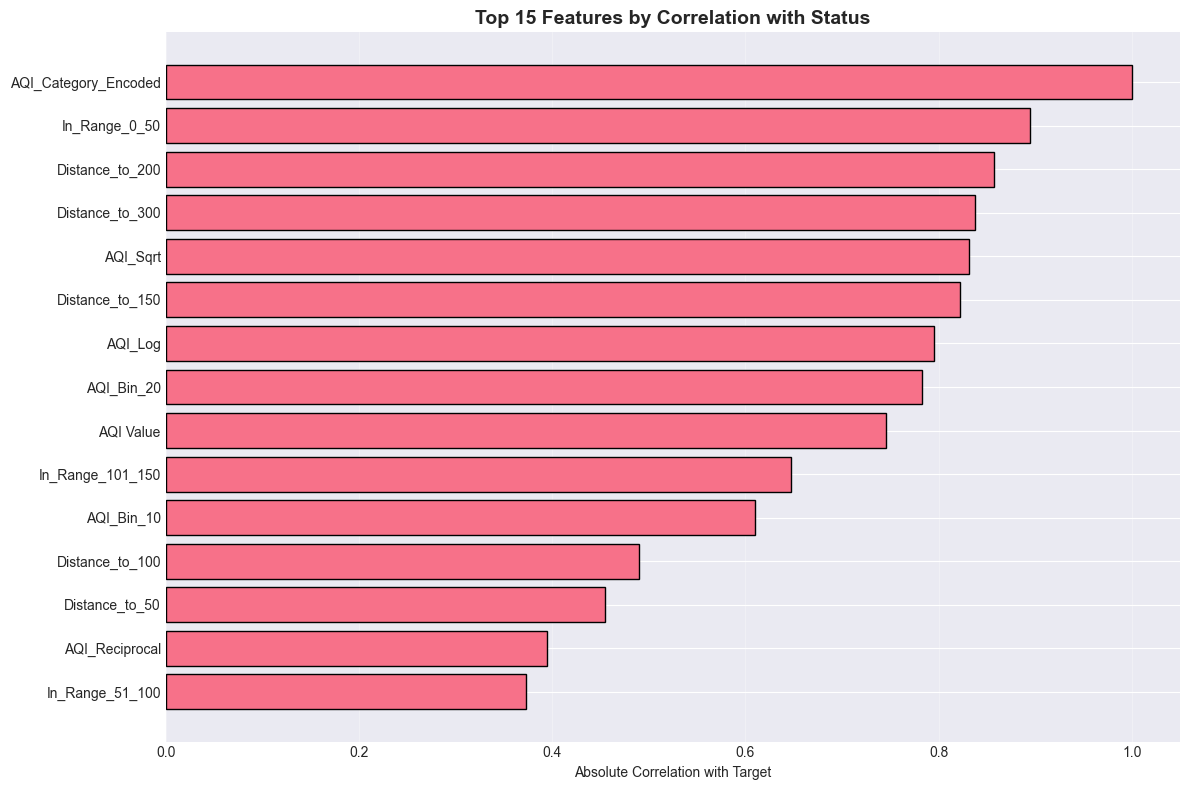

In [316]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Correlation'], edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 15 Features by Correlation with Status', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [317]:
# Check for highly correlated features (multicollinearity)
print("=" * 60)
print("MULTICOLLINEARITY CHECK")
print("=" * 60)

# Calculate correlation matrix for numerical features
corr_matrix = X[numerical_features].corr().abs()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.95:  # Threshold for high correlation
            high_corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\nFound {len(high_corr_pairs)} highly correlated feature pairs (>0.95):")
    for pair in high_corr_pairs[:10]:  # Show first 10
        print(f"  {pair['Feature1']} <-> {pair['Feature2']}: {pair['Correlation']:.3f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.95)")

print("\nNote: Highly correlated features may be removed during feature selection if needed.")


MULTICOLLINEARITY CHECK

Found 3 highly correlated feature pairs (>0.95):
  AQI Value <-> AQI_Sqrt: 0.955
  AQI Value <-> AQI_Bin_20: 0.965
  AQI_Log <-> AQI_Sqrt: 0.958

Note: Highly correlated features may be removed during feature selection if needed.


### 3.6 Preprocessing Summary


In [318]:
print("=" * 60)
print("DATA PREPROCESSING SUMMARY")
print("=" * 60)

print(f"\n1. Data Cleaning:")
print(f"   - Removed {duplicates_removed:,} duplicate rows")
print(f"   - Flagged {outlier_count:,} outliers ({outlier_count/len(df_processed)*100:.2f}%)")

print(f"\n2. Feature Engineering (AQI Value ONLY - DEPLOYMENT-READY):")
print(f"   - AQI transformations: AQI_Squared, AQI_Log, AQI_Sqrt, AQI_Cubed, AQI_Reciprocal")
print(f"   - AQI bins: AQI_Bin_10, AQI_Bin_20 (bin edges saved for deployment)")
print(f"   - Distance features: Distance_to_50, 100, 150, 200, 300")
print(f"   - Range indicators: In_Range_0_50, 51_100, 101_150, 151_200, 201_300, 300_plus")
print(f"   - Outlier flag: Is_Outlier (IQR bounds saved for deployment)")
print(f"   - Total engineered features: {len(feature_columns)}")
print(f"   - ✅ All features can be calculated from a single AQI value")
print(f"   - ❌ Removed: Global stats, Z_Score, Percentile, Normalized (require full dataset)")
print(f"   - Note: Country and Date features removed as per requirement")

print(f"\n3. Data Transformation:")
print(f"   - Encoded categorical variable (AQI_Category)")
print(f"   - Created feature matrix X: {X.shape}")
print(f"   - Created target vector y: {y.shape}")

print(f"\n4. Target Variable:")
print(f"   - Classes: {len(y.unique())}")
print(f"   - Distribution:")
for status, count in y.value_counts().items():
    print(f"     {status}: {count} ({count/len(y)*100:.2f}%)")

print(f"\n5. Feature Set:")
print(f"   - All features derived from AQI Value only")
print(f"   - Ready for IoT device prediction (input: AQI Value, output: Status)")

print(f"\n6. Next Steps:")
print(f"   - Split data into training, validation, and test sets")
print(f"   - Apply feature scaling")
print(f"   - Train machine learning models")
print(f"   - Evaluate model performance")

print("\n" + "=" * 60)
print("PREPROCESSING COMPLETE!")
print("=" * 60)


DATA PREPROCESSING SUMMARY

1. Data Cleaning:
   - Removed 300 duplicate rows
   - Flagged 899 outliers (4.07%)

2. Feature Engineering (AQI Value ONLY - DEPLOYMENT-READY):
   - AQI transformations: AQI_Squared, AQI_Log, AQI_Sqrt, AQI_Cubed, AQI_Reciprocal
   - AQI bins: AQI_Bin_10, AQI_Bin_20 (bin edges saved for deployment)
   - Distance features: Distance_to_50, 100, 150, 200, 300
   - Range indicators: In_Range_0_50, 51_100, 101_150, 151_200, 201_300, 300_plus
   - Outlier flag: Is_Outlier (IQR bounds saved for deployment)
   - Total engineered features: 21
   - ✅ All features can be calculated from a single AQI value
   - ❌ Removed: Global stats, Z_Score, Percentile, Normalized (require full dataset)
   - Note: Country and Date features removed as per requirement

3. Data Transformation:
   - Encoded categorical variable (AQI_Category)
   - Created feature matrix X: (22111, 21)
   - Created target vector y: (22111,)

4. Target Variable:
   - Classes: 6
   - Distribution:
     Good

In [319]:
# Save deployment parameters for later use
print("=" * 60)
print("SAVING DEPLOYMENT PARAMETERS")
print("=" * 60)

import pickle
import os

# Ensure deployment_params exists and has all required values
if 'deployment_params' not in globals() or deployment_params.get('aqi_bin_10_edges') is None:
    # Recalculate if needed
    Q1 = df_processed['AQI Value'].quantile(0.25)
    Q3 = df_processed['AQI Value'].quantile(0.75)
    IQR = Q3 - Q1
    aqi_min = df_processed['AQI Value'].min()
    aqi_max = df_processed['AQI Value'].max()
    
    _, bin_edges_10 = pd.cut(df_processed['AQI Value'], bins=10, labels=False, retbins=True)
    _, bin_edges_20 = pd.cut(df_processed['AQI Value'], bins=20, labels=False, retbins=True)
    
    # Create or update deployment_params
    if 'deployment_params' not in globals():
        deployment_params = {}
    
    deployment_params['outlier_lower_bound'] = Q1 - 1.5 * IQR
    deployment_params['outlier_upper_bound'] = Q3 + 1.5 * IQR
    deployment_params['aqi_bin_10_edges'] = bin_edges_10
    deployment_params['aqi_bin_20_edges'] = bin_edges_20
    deployment_params['aqi_min'] = aqi_min
    deployment_params['aqi_max'] = aqi_max

# Save deployment parameters and feature columns
with open('deployment_params.pkl', 'wb') as f:
    pickle.dump(deployment_params, f)

# Save feature columns order (critical for deployment!)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print("✓ Saved deployment parameters to 'deployment_params.pkl'")
print("✓ Saved feature columns order to 'feature_columns.pkl'")
print("\nDeployment parameters:")
for key, value in deployment_params.items():
    if isinstance(value, np.ndarray):
        print(f"  - {key}: array of {len(value)} values (range: {value.min():.2f} to {value.max():.2f})")
    elif value is None:
        print(f"  - {key}: NOT SET (will be recalculated)")
    else:
        print(f"  - {key}: {value:.2f}")

# Verify all required parameters are present
required_params = ['outlier_lower_bound', 'outlier_upper_bound', 'aqi_bin_10_edges', 'aqi_bin_20_edges']
missing = [p for p in required_params if p not in deployment_params or deployment_params[p] is None]
if missing:
    print(f"\n⚠️  WARNING: Missing parameters: {missing}")
    print("   Recalculating...")
    Q1 = df_processed['AQI Value'].quantile(0.25)
    Q3 = df_processed['AQI Value'].quantile(0.75)
    IQR = Q3 - Q1
    _, bin_edges_10 = pd.cut(df_processed['AQI Value'], bins=10, labels=False, retbins=True)
    _, bin_edges_20 = pd.cut(df_processed['AQI Value'], bins=20, labels=False, retbins=True)
    
    if 'aqi_bin_10_edges' in missing:
        deployment_params['aqi_bin_10_edges'] = bin_edges_10
    if 'aqi_bin_20_edges' in missing:
        deployment_params['aqi_bin_20_edges'] = bin_edges_20
    if 'outlier_lower_bound' in missing:
        deployment_params['outlier_lower_bound'] = Q1 - 1.5 * IQR
    if 'outlier_upper_bound' in missing:
        deployment_params['outlier_upper_bound'] = Q3 + 1.5 * IQR
    
    print("   ✓ All parameters now set")
else:
    print("\n✓ All required deployment parameters are present!")

print("\n📦 FILES SAVED FOR DEPLOYMENT:")
print("  1. deployment_params.pkl - Contains bin edges and IQR bounds")
print("  2. label_encoder_aqi_category.pkl - Label encoder for AQI_Category")
print("  3. feature_columns.pkl - Feature column names in correct order")
print("  4. transform_aqi_to_features() function - Feature transformation function")
print("  5. (To be saved later) Scaler - Feature scaler from training")
print("  6. (To be saved later) Model - Trained ML model")

print("\n📝 DEPLOYMENT WORKFLOW:")
print("  1. Load saved files:")
print("     - deployment_params.pkl (bin edges, IQR bounds)")
print("     - feature_columns.pkl (feature order)")
print("     - label_encoder_aqi_category.pkl (category encoding)")
print("     - scaler.pkl (feature scaler - to be saved after training)")
print("     - model.pkl (trained model - to be saved after training)")
print("  2. Receive AQI Value from IoT device (single number)")
print("  3. Use transform_aqi_to_array(aqi_value, deployment_params, feature_columns)")
print("     This creates all features from the single AQI value")
print("  4. Apply scaler.transform(features.reshape(1, -1)) to scale features")
print("  5. Use model.predict(scaled_features) to get Status prediction")
print("  6. Return predicted Status to IoT device/user")
print("\n✅ All features are deployment-ready - no full dataset required!")


SAVING DEPLOYMENT PARAMETERS
✓ Saved deployment parameters to 'deployment_params.pkl'
✓ Saved feature columns order to 'feature_columns.pkl'

Deployment parameters:
  - outlier_lower_bound: -49.00
  - outlier_upper_bound: 159.00
  - aqi_bin_10_edges: array of 11 values (range: 0.04 to 963.00)
  - aqi_bin_20_edges: array of 21 values (range: 0.04 to 963.00)
  - aqi_min: 1.00
  - aqi_max: 963.00

✓ All required deployment parameters are present!

📦 FILES SAVED FOR DEPLOYMENT:
  1. deployment_params.pkl - Contains bin edges and IQR bounds
  2. label_encoder_aqi_category.pkl - Label encoder for AQI_Category
  3. feature_columns.pkl - Feature column names in correct order
  4. transform_aqi_to_features() function - Feature transformation function
  5. (To be saved later) Scaler - Feature scaler from training
  6. (To be saved later) Model - Trained ML model

📝 DEPLOYMENT WORKFLOW:
  1. Load saved files:
     - deployment_params.pkl (bin edges, IQR bounds)
     - feature_columns.pkl (feature

In [320]:
# Verify and fix deployment parameters if needed
print("=" * 60)
print("VERIFYING DEPLOYMENT PARAMETERS")
print("=" * 60)

# Check if bin edges are missing
if 'deployment_params' in globals() and deployment_params.get('aqi_bin_10_edges') is None:
    print("⚠️  Bin edges missing - recalculating...")
    _, bin_edges_10 = pd.cut(df_processed['AQI Value'], bins=10, labels=False, retbins=True)
    _, bin_edges_20 = pd.cut(df_processed['AQI Value'], bins=20, labels=False, retbins=True)
    deployment_params['aqi_bin_10_edges'] = bin_edges_10
    deployment_params['aqi_bin_20_edges'] = bin_edges_20
    
    # Re-save with bin edges
    with open('deployment_params.pkl', 'wb') as f:
        pickle.dump(deployment_params, f)
    print("✓ Re-saved deployment_params.pkl with bin edges")
    
# Final verification
print("\nFinal deployment parameters:")
for key, value in deployment_params.items():
    if isinstance(value, np.ndarray):
        print(f"  ✓ {key}: array of {len(value)} values")
    elif value is None:
        print(f"  ✗ {key}: MISSING!")
    else:
        print(f"  ✓ {key}: {value:.2f}")

print("\n✅ Deployment parameters ready!")


VERIFYING DEPLOYMENT PARAMETERS

Final deployment parameters:
  ✓ outlier_lower_bound: -49.00
  ✓ outlier_upper_bound: 159.00
  ✓ aqi_bin_10_edges: array of 11 values
  ✓ aqi_bin_20_edges: array of 21 values
  ✓ aqi_min: 1.00
  ✓ aqi_max: 963.00

✅ Deployment parameters ready!


### 3.7 Deployment Readiness Check


In [321]:
# Verify all features are deployment-ready
print("=" * 60)
print("DEPLOYMENT READINESS CHECK")
print("=" * 60)

deployment_ready = True
issues = []

# Check each feature
for feature in feature_columns:
    # Features that require full dataset
    problematic_features = ['Global_Mean', 'Global_Std', 'Global_Median', 
                           'Z_Score', 'Percentile', 'Normalized']
    if any(prob in feature for prob in problematic_features):
        deployment_ready = False
        issues.append(f"❌ {feature}: Requires full dataset statistics")

if deployment_ready:
    print("✅ ALL FEATURES ARE DEPLOYMENT-READY!")
    print(f"\n✓ Total features: {len(feature_columns)}")
    print("✓ All features can be calculated from a single AQI value")
    print("✓ No features require full dataset")
else:
    print("⚠️  DEPLOYMENT ISSUES FOUND:")
    for issue in issues:
        print(f"  {issue}")

print("\n📋 DEPLOYMENT WORKFLOW:")
print("  1. IoT device sends AQI Value (single number)")
print("  2. Calculate all features from that AQI value:")
print("     - Transformations: squared, log, sqrt, cubed, reciprocal")
print("     - Bins: use saved bin edges")
print("     - Distances: abs(AQI - threshold)")
print("     - Ranges: binary indicators")
print("     - Outlier: check against saved IQR bounds")
print("  3. Load saved scaler and transform features")
print("  4. Load saved model and predict Status")
print("  5. Return predicted Status to IoT device/user")

print("\n✅ Ready for deployment!")


DEPLOYMENT READINESS CHECK
✅ ALL FEATURES ARE DEPLOYMENT-READY!

✓ Total features: 21
✓ All features can be calculated from a single AQI value
✓ No features require full dataset

📋 DEPLOYMENT WORKFLOW:
  1. IoT device sends AQI Value (single number)
  2. Calculate all features from that AQI value:
     - Transformations: squared, log, sqrt, cubed, reciprocal
     - Bins: use saved bin edges
     - Distances: abs(AQI - threshold)
     - Ranges: binary indicators
     - Outlier: check against saved IQR bounds
  3. Load saved scaler and transform features
  4. Load saved model and predict Status
  5. Return predicted Status to IoT device/user

✅ Ready for deployment!


---

## 4. Train & Splitting

### 4.1 Data Splitting Strategy

We'll split the data into:
- **Training set** (60%): Used to train the model
- **Validation set** (20%): Used for hyperparameter tuning and model selection
- **Test set** (20%): Used for final evaluation (unseen data)


In [322]:
# Import splitting and scaling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

print("Libraries imported for train/test splitting and scaling")


Libraries imported for train/test splitting and scaling


In [323]:
# First split: Training (80%) and Test (20%)
print("=" * 60)
print("STEP 1: TRAINING-TEST SPLIT")
print("=" * 60)

# Stratified split to maintain class distribution
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"Training + Validation set: {X_train_temp.shape[0]:,} samples ({X_train_temp.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nTest set target distribution:")
print(y_test.value_counts())


STEP 1: TRAINING-TEST SPLIT
Training + Validation set: 17,688 samples (80.0%)
Test set: 4,423 samples (20.0%)

Test set target distribution:
Status
Good                              2140
Moderate                          1587
Unhealthy for Sensitive Groups     451
Unhealthy                          187
Very Unhealthy                      37
Hazardous                           21
Name: count, dtype: int64


In [324]:
# Second split: Training (75% of 80% = 60%) and Validation (25% of 80% = 20%)
print("=" * 60)
print("STEP 2: TRAINING-VALIDATION SPLIT")
print("=" * 60)

# Split the training set into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp,
    test_size=0.25,  # 25% of 80% = 20% of total
    random_state=42,
    stratify=y_train_temp  # Maintain class distribution
)

print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nValidation set target distribution:")
print(y_val.value_counts())
print("\nTest set target distribution:")
print(y_test.value_counts())


STEP 2: TRAINING-VALIDATION SPLIT
Training set: 13,266 samples (60.0%)
Validation set: 4,422 samples (20.0%)
Test set: 4,423 samples (20.0%)

Training set target distribution:
Status
Good                              6418
Moderate                          4760
Unhealthy for Sensitive Groups    1352
Unhealthy                          560
Very Unhealthy                     112
Hazardous                           64
Name: count, dtype: int64

Validation set target distribution:
Status
Good                              2139
Moderate                          1587
Unhealthy for Sensitive Groups     451
Unhealthy                          187
Very Unhealthy                      37
Hazardous                           21
Name: count, dtype: int64

Test set target distribution:
Status
Good                              2140
Moderate                          1587
Unhealthy for Sensitive Groups     451
Unhealthy                          187
Very Unhealthy                      37
Hazardous           

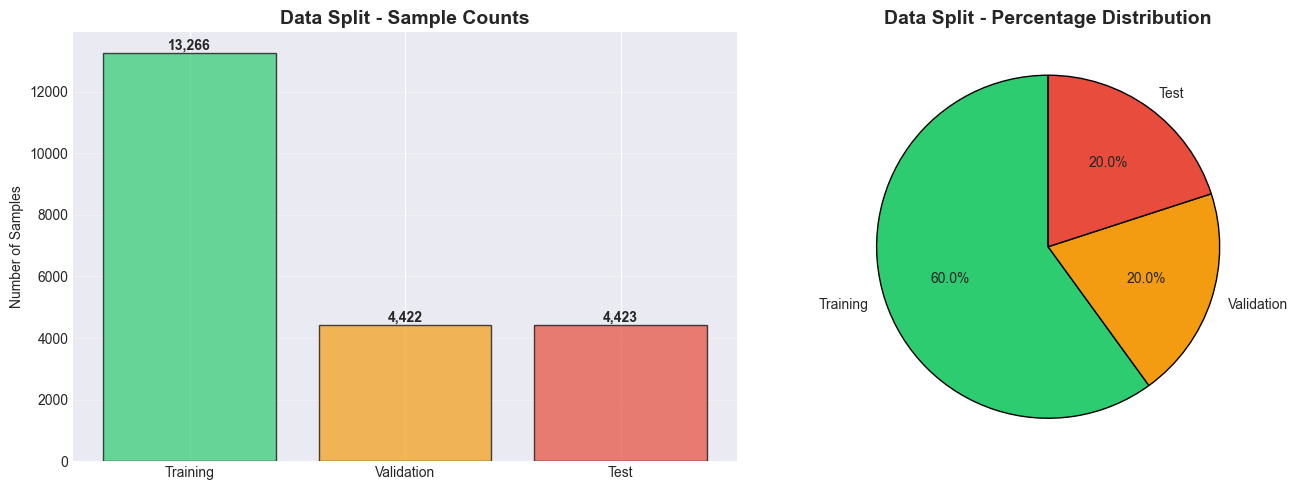

In [325]:
# Visualize the split distribution
plt.figure(figsize=(14, 5))

# Plot 1: Sample counts
plt.subplot(1, 2, 1)
split_counts = [len(X_train), len(X_val), len(X_test)]
split_labels = ['Training', 'Validation', 'Test']
colors = ['#2ecc71', '#f39c12', '#e74c3c']
plt.bar(split_labels, split_counts, color=colors, edgecolor='black', alpha=0.7)
plt.title('Data Split - Sample Counts', fontsize=14, fontweight='bold')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3, axis='y')
for i, (label, count) in enumerate(zip(split_labels, split_counts)):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Percentage distribution
plt.subplot(1, 2, 2)
split_percentages = [len(X_train)/len(X)*100, len(X_val)/len(X)*100, len(X_test)/len(X)*100]
plt.pie(split_percentages, labels=split_labels, autopct='%1.1f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Data Split - Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 4.2 Feature Scaling


In [326]:
# Feature Scaling
print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)
print("Using StandardScaler (Z-score normalization)")
print("Note: Fit only on training data to prevent data leakage")

# Initialize scaler
scaler = StandardScaler()

# Fit scaler ONLY on training data
scaler.fit(X_train)
print(f"✓ Scaler fitted on training data: {X_train.shape[0]:,} samples")

# Transform all sets using the scaler fitted on training data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Training set scaled: {X_train_scaled.shape}")
print(f"✓ Validation set scaled: {X_val_scaled.shape}")
print(f"✓ Test set scaled: {X_test_scaled.shape}")

# Convert back to DataFrames for easier handling (optional, but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("\nScaling statistics (from training data):")
print(f"  Mean per feature: {scaler.mean_[:5]}... (showing first 5)")
print(f"  Std per feature: {scaler.scale_[:5]}... (showing first 5)")


FEATURE SCALING
Using StandardScaler (Z-score normalization)
Note: Fit only on training data to prevent data leakage
✓ Scaler fitted on training data: 13,266 samples
✓ Training set scaled: (13266, 21)
✓ Validation set scaled: (4422, 21)
✓ Test set scaled: (4423, 21)

Scaling statistics (from training data):
  Mean per feature: [6.25070858e+01 4.01778984e-02 6.51880258e+03 3.86963519e+00
 7.37815807e+00]... (showing first 5)
  Std per feature: [5.11044695e+01 1.96376258e-01 2.01175674e+04 8.02771125e-01
 2.84075154e+00]... (showing first 5)


In [327]:
# Save the scaler for deployment
print("=" * 60)
print("SAVING SCALER FOR DEPLOYMENT")
print("=" * 60)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✓ Saved scaler to 'scaler.pkl'")
print("  This scaler will be used in deployment to scale new AQI values")
print("  Important: Always use the same scaler that was fit on training data!")


SAVING SCALER FOR DEPLOYMENT
✓ Saved scaler to 'scaler.pkl'
  This scaler will be used in deployment to scale new AQI values
  Important: Always use the same scaler that was fit on training data!


### 4.3 Target Variable Encoding


In [328]:
# Encode target variable (Status) for machine learning models
print("=" * 60)
print("TARGET VARIABLE ENCODING")
print("=" * 60)

# Create label encoder for target
le_target = LabelEncoder()

# Fit on all data to ensure all classes are encoded
le_target.fit(y)

# Transform all target sets
y_train_encoded = le_target.transform(y_train)
y_val_encoded = le_target.transform(y_val)
y_test_encoded = le_target.transform(y_test)

print(f"Target classes: {le_target.classes_}")
print(f"Class mapping:")
for i, class_name in enumerate(le_target.classes_):
    print(f"  {class_name} -> {i}")

print(f"\nTraining set target distribution (encoded):")
unique, counts = np.unique(y_train_encoded, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u} ({le_target.classes_[u]}): {c:,} samples ({c/len(y_train_encoded)*100:.1f}%)")

# Save label encoder for deployment (to decode predictions back to Status names)
with open('label_encoder_target.pkl', 'wb') as f:
    pickle.dump(le_target, f)

print("\n✓ Saved target label encoder to 'label_encoder_target.pkl'")
print("  This will be used to decode model predictions back to Status names")


TARGET VARIABLE ENCODING
Target classes: ['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']
Class mapping:
  Good -> 0
  Hazardous -> 1
  Moderate -> 2
  Unhealthy -> 3
  Unhealthy for Sensitive Groups -> 4
  Very Unhealthy -> 5

Training set target distribution (encoded):
  Class 0 (Good): 6,418 samples (48.4%)
  Class 1 (Hazardous): 64 samples (0.5%)
  Class 2 (Moderate): 4,760 samples (35.9%)
  Class 3 (Unhealthy): 560 samples (4.2%)
  Class 4 (Unhealthy for Sensitive Groups): 1,352 samples (10.2%)
  Class 5 (Very Unhealthy): 112 samples (0.8%)

✓ Saved target label encoder to 'label_encoder_target.pkl'
  This will be used to decode model predictions back to Status names


### 4.4 Data Split Summary


In [329]:
print("=" * 60)
print("DATA SPLIT SUMMARY")
print("=" * 60)

print(f"\n1. Dataset Sizes:")
print(f"   - Original dataset: {len(X):,} samples")
print(f"   - Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   - Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n2. Feature Information:")
print(f"   - Number of features: {len(feature_columns)}")
print(f"   - Feature shape: {X_train_scaled.shape[1]} features")
print(f"   - All features scaled using StandardScaler")

print(f"\n3. Target Variable:")
print(f"   - Number of classes: {len(le_target.classes_)}")
print(f"   - Classes: {list(le_target.classes_)}")
print(f"   - Stratified splitting: ✓ (maintains class distribution)")

print(f"\n4. Files Saved:")
print(f"   - scaler.pkl: Feature scaler (fit on training data)")
print(f"   - label_encoder_target.pkl: Target label encoder")
print(f"   - feature_columns.pkl: Feature order (already saved)")
print(f"   - deployment_params.pkl: Deployment parameters (already saved)")

print(f"\n5. Data Leakage Prevention:")
print(f"   ✓ Scaler fit only on training data")
print(f"   ✓ Validation and test sets scaled using training scaler")
print(f"   ✓ No information from validation/test leaked into training")

print(f"\n6. Next Steps:")
print(f"   - Train multiple machine learning models")
print(f"   - Evaluate on validation set")
print(f"   - Select best model")
print(f"   - Final evaluation on test set")

print("\n" + "=" * 60)
print("TRAIN/TEST SPLITTING COMPLETE!")
print("=" * 60)


DATA SPLIT SUMMARY

1. Dataset Sizes:
   - Original dataset: 22,111 samples
   - Training set: 13,266 samples (60.0%)
   - Validation set: 4,422 samples (20.0%)
   - Test set: 4,423 samples (20.0%)

2. Feature Information:
   - Number of features: 21
   - Feature shape: 21 features
   - All features scaled using StandardScaler

3. Target Variable:
   - Number of classes: 6
   - Classes: ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']
   - Stratified splitting: ✓ (maintains class distribution)

4. Files Saved:
   - scaler.pkl: Feature scaler (fit on training data)
   - label_encoder_target.pkl: Target label encoder
   - feature_columns.pkl: Feature order (already saved)
   - deployment_params.pkl: Deployment parameters (already saved)

5. Data Leakage Prevention:
   ✓ Scaler fit only on training data
   ✓ Validation and test sets scaled using training scaler
   ✓ No information from validation/test leaked into training

6. Next Steps:
 

In [330]:
# Create deployment helper function
print("=" * 60)
print("CREATING DEPLOYMENT HELPER FUNCTION")
print("=" * 60)

def transform_aqi_to_features(aqi_value, deployment_params):
    """
    Transform a single AQI value into all features for model prediction.
    
    This function is designed for deployment - it takes a single AQI value
    from an IoT device and creates all the features needed for prediction.
    
    Parameters:
    -----------
    aqi_value : float
        Single AQI value from IoT device
    deployment_params : dict
        Dictionary containing saved parameters (bin edges, IQR bounds, etc.)
    
    Returns:
    --------
    features : dict
        Dictionary of all feature values
    """
    features = {}
    
    # 1. Original AQI Value
    features['AQI Value'] = aqi_value
    
    # 2. Transformations
    features['AQI_Squared'] = aqi_value ** 2
    features['AQI_Log'] = np.log1p(aqi_value)
    features['AQI_Sqrt'] = np.sqrt(aqi_value)
    features['AQI_Cubed'] = aqi_value ** 3
    features['AQI_Reciprocal'] = 1 / (aqi_value + 1)
    
    # 3. Bins (using saved bin edges)
    if 'aqi_bin_10_edges' in deployment_params:
        features['AQI_Bin_10'] = np.digitize(aqi_value, deployment_params['aqi_bin_10_edges'][1:-1]) - 1
        features['AQI_Bin_10'] = max(0, min(9, features['AQI_Bin_10']))  # Clamp to [0, 9]
    
    if 'aqi_bin_20_edges' in deployment_params:
        features['AQI_Bin_20'] = np.digitize(aqi_value, deployment_params['aqi_bin_20_edges'][1:-1]) - 1
        features['AQI_Bin_20'] = max(0, min(19, features['AQI_Bin_20']))  # Clamp to [0, 19]
    
    # 4. Distance features
    features['Distance_to_50'] = abs(aqi_value - 50)
    features['Distance_to_100'] = abs(aqi_value - 100)
    features['Distance_to_150'] = abs(aqi_value - 150)
    features['Distance_to_200'] = abs(aqi_value - 200)
    features['Distance_to_300'] = abs(aqi_value - 300)
    
    # 5. Range indicators
    features['In_Range_0_50'] = 1 if 0 <= aqi_value <= 50 else 0
    features['In_Range_51_100'] = 1 if 51 <= aqi_value <= 100 else 0
    features['In_Range_101_150'] = 1 if 101 <= aqi_value <= 150 else 0
    features['In_Range_151_200'] = 1 if 151 <= aqi_value <= 200 else 0
    features['In_Range_201_300'] = 1 if 201 <= aqi_value <= 300 else 0
    features['In_Range_300_plus'] = 1 if aqi_value > 300 else 0
    
    # 6. AQI Category
    if aqi_value <= 50:
        aqi_category = 'Good'
    elif aqi_value <= 100:
        aqi_category = 'Moderate'
    elif aqi_value <= 150:
        aqi_category = 'Unhealthy_for_Sensitive'
    elif aqi_value <= 200:
        aqi_category = 'Unhealthy'
    elif aqi_value <= 300:
        aqi_category = 'Very_Unhealthy'
    else:
        aqi_category = 'Hazardous'
    
    # Encode category (will need label encoder from training)
    # For now, we'll use a simple mapping
    category_map = {
        'Good': 0, 'Moderate': 1, 'Unhealthy_for_Sensitive': 2,
        'Unhealthy': 3, 'Very_Unhealthy': 4, 'Hazardous': 5
    }
    features['AQI_Category_Encoded'] = category_map.get(aqi_category, 0)
    
    # 7. Outlier flag (using saved IQR bounds)
    if 'outlier_lower_bound' in deployment_params and 'outlier_upper_bound' in deployment_params:
        lower = deployment_params['outlier_lower_bound']
        upper = deployment_params['outlier_upper_bound']
        features['Is_Outlier'] = 1 if (aqi_value < lower or aqi_value > upper) else 0
    else:
        features['Is_Outlier'] = 0
    
    return features

def transform_aqi_to_array(aqi_value, deployment_params, feature_columns):
    """
    Transform AQI value to feature array in the correct order for model prediction.
    
    Parameters:
    -----------
    aqi_value : float
        Single AQI value from IoT device
    deployment_params : dict
        Dictionary containing saved parameters
    feature_columns : list
        List of feature column names in the correct order
    
    Returns:
    --------
    feature_array : numpy array
        Array of features in the correct order for model prediction
    """
    features_dict = transform_aqi_to_features(aqi_value, deployment_params)
    
    # Convert to array in the correct order
    feature_array = np.array([features_dict[col] for col in feature_columns])
    
    return feature_array

# Test the function with a sample AQI value
test_aqi = 75.0
test_features = transform_aqi_to_features(test_aqi, deployment_params)
test_array = transform_aqi_to_array(test_aqi, deployment_params, feature_columns)

print("✓ Created transform_aqi_to_features() function")
print("✓ Created transform_aqi_to_array() function (for model input)")
print(f"\nTest: AQI Value = {test_aqi}")
print(f"Generated {len(test_features)} features")
print(f"Feature array shape: {test_array.shape}")
print(f"Feature array matches feature_columns: {len(test_array) == len(feature_columns)}")

print("\n📝 DEPLOYMENT USAGE EXAMPLE:")
print("  ```python")
print("  import pickle")
print("  import numpy as np")
print("  ")
print("  # 1. Load saved files")
print("  with open('deployment_params.pkl', 'rb') as f:")
print("      deployment_params = pickle.load(f)")
print("  with open('feature_columns.pkl', 'rb') as f:")
print("      feature_columns = pickle.load(f)")
print("  with open('scaler.pkl', 'rb') as f:")
print("      scaler = pickle.load(f)")
print("  with open('model.pkl', 'rb') as f:")
print("      model = pickle.load(f)")
print("  ")
print("  # 2. Receive AQI value from IoT device")
print("  aqi_value = 75.0  # Example: single value from IoT")
print("  ")
print("  # 3. Transform to features (using saved function)")
print("  features = transform_aqi_to_array(aqi_value, deployment_params, feature_columns)")
print("  ")
print("  # 4. Scale features")
print("  features_scaled = scaler.transform(features.reshape(1, -1))")
print("  ")
print("  # 5. Predict Status")
print("  predicted_status = model.predict(features_scaled)[0]")
print("  ")
print("  # 6. Return to IoT device/user")
print("  return predicted_status")
print("  ```")
print("\n✅ Deployment is ready! All features can be calculated from a single AQI value.")


CREATING DEPLOYMENT HELPER FUNCTION
✓ Created transform_aqi_to_features() function
✓ Created transform_aqi_to_array() function (for model input)

Test: AQI Value = 75.0
Generated 21 features
Feature array shape: (21,)
Feature array matches feature_columns: True

📝 DEPLOYMENT USAGE EXAMPLE:
  ```python
  import pickle
  import numpy as np
  
  # 1. Load saved files
  with open('deployment_params.pkl', 'rb') as f:
      deployment_params = pickle.load(f)
  with open('feature_columns.pkl', 'rb') as f:
      feature_columns = pickle.load(f)
  with open('scaler.pkl', 'rb') as f:
      scaler = pickle.load(f)
  with open('model.pkl', 'rb') as f:
      model = pickle.load(f)
  
  # 2. Receive AQI value from IoT device
  aqi_value = 75.0  # Example: single value from IoT
  
  # 3. Transform to features (using saved function)
  features = transform_aqi_to_array(aqi_value, deployment_params, feature_columns)
  
  # 4. Scale features
  features_scaled = scaler.transform(features.reshape(1, -1))
 